<h1>The Lorenz System</h1>

<h2>1. The Lorenz System of differential equations</h2>

<p>The Lorenz system of differential equations are given by:</p>

$$\frac{dx}{dt} = \sigma (y - x)$$
$$\frac{dy}{dt} = x(\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

<p>The equations were originally used as simple convection models for the atmosphere. The system exhibits chaos and is the foundation of the modern mathematical study of chaos.</p>

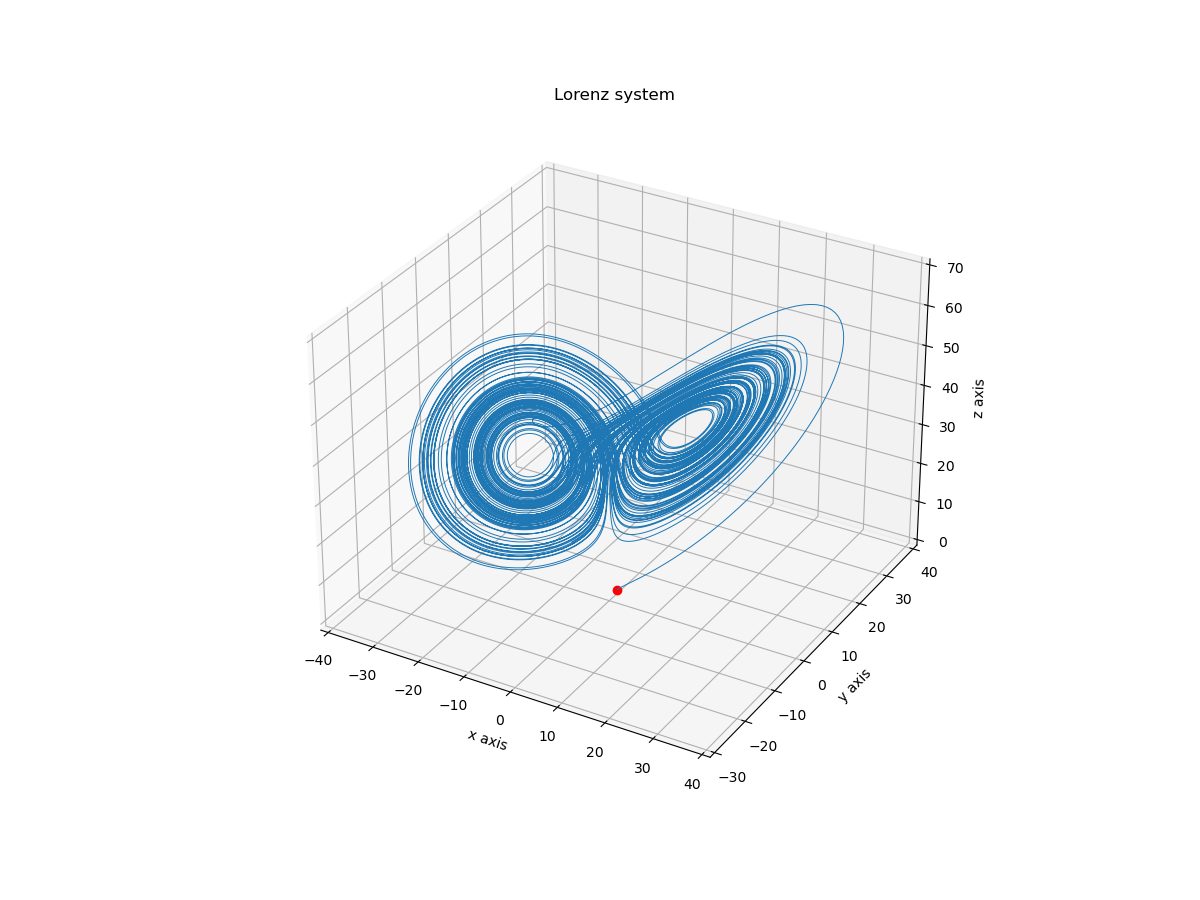

In [49]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import copy
#Lorenz system
def f(r: tuple, params):
    x, y, z = r
    sigma, rho, beta = params
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta * z
    return dx, dy, dz


#RK4 solver for IVP
def RK4(func, init: tuple, t0: float, numSteps: int, params: tuple, maxTime = 10.0):
    h = (maxTime - t0)/numSteps
    prevPosition = init

    x = np.empty(numSteps)
    y = np.empty(numSteps)
    z = np.empty(numSteps)
    x0, y0, z0 = prevPosition

    xdot = np.empty(numSteps)
    ydot = np.empty(numSteps)
    zdot = np.empty(numSteps)

    for i in range(0, numSteps):
        k0, l0, m0 = func(prevPosition, params) #Gets xdot, ydot, zdot at given instant of time
        k1, l1, m1 = func((x0 + h * k0/2, y0 + h * l0/2, z0 + h * m0/2), params)
        k2, l2, m2 = func((x0 + h * k1/2, y0 + h * l1/2, z0 + h * m1/2), params)
        k3, l3, m3 = func((x0 + h * k2, y0 + h * l2, z0 + h * m2), params)
        x0 = x0 + h/6 * (k0 + 2*k1 + 2*k2 + k3)
        y0 = y0 + h/6 * (l0 + 2*l1 + 2*l2 + l3)
        z0 = z0 + h/6 * (m0 + 2*m1 + 2*m2 + m3)

        x[i] = x0
        y[i] = y0
        z[i] = z0
        prevPosition = x0, y0, z0
        xdot[i] = k0
        ydot[i] = l0
        zdot[i] = m0
    return x, y, z, xdot, ydot, zdot

initPos = (1, 1, 1)
timeLimit = 100
x, y, z, dx, dy, dz = RK4(func = f, init = copy.copy(initPos), t0 = 0, numSteps = 40000, params = (15,40,2.66), maxTime = timeLimit)    #params = (sigma, rho, beta)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")
ax.plot(initPos[0], initPos[1], initPos[2], "ro", label="Initial Position")

ax.set_title("Lorenz system")
ax.set_xticks(np.arange(-300, 400, 10))
ax.set_yticks(np.arange(-400, 500, 10))
ax.set_zticks(np.arange(0, 200, 10))
ax.set_xlim(-40,40)
ax.set_ylim(-30,40)
ax.set_zlim(0,70)
ax.plot(x, y, z, lw = 0.7)

plt.savefig("lorenz.jpeg", dpi=250)
plt.show()

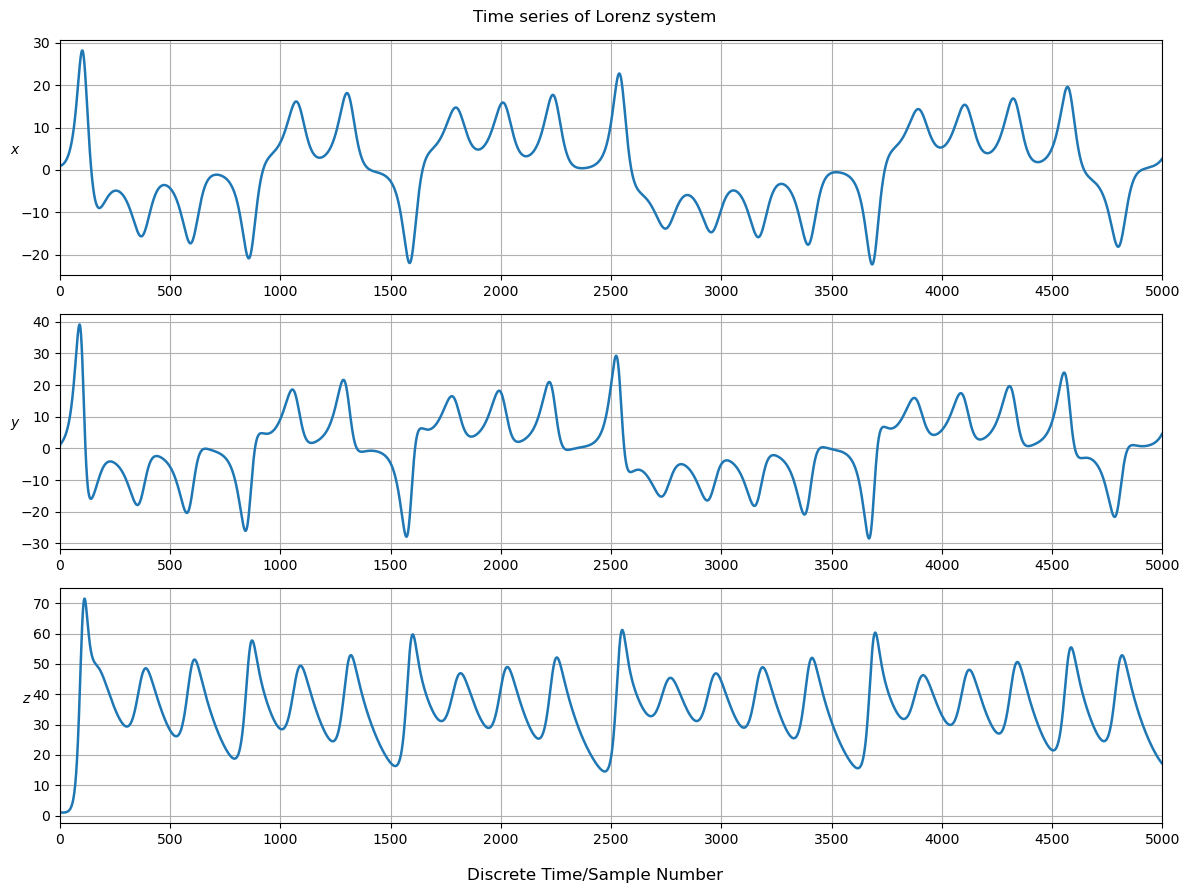

In [50]:
plt.close()
%matplotlib inline
fig, ax = plt.subplots(3,1, figsize=(12,9))

fig.suptitle("Time series of Lorenz system")
ax[0].set_ylabel(r'$x$', rotation="horizontal")
ax[1].set_ylabel(r'$y$', rotation="horizontal")
ax[2].set_ylabel(r'$z$', rotation="horizontal")
fig.supxlabel('Discrete Time/Sample Number')

maxSample = 5000
ax[0].plot(x[:maxSample], linewidth="1.8")
ax[1].plot(y[:maxSample], linewidth="1.8")
ax[2].plot(z[:maxSample], linewidth="1.8")
for i in range(0,3):
    ax[i].margins(x=0)
    ax[i].set_xticks(np.arange(0,maxSample + 500, 500))
    ax[i].set_xlim(0,maxSample)
    ax[i].grid()
fig.tight_layout()
plt.savefig("timeseries.jpeg", dpi=150)
plt.show()
plt.close()

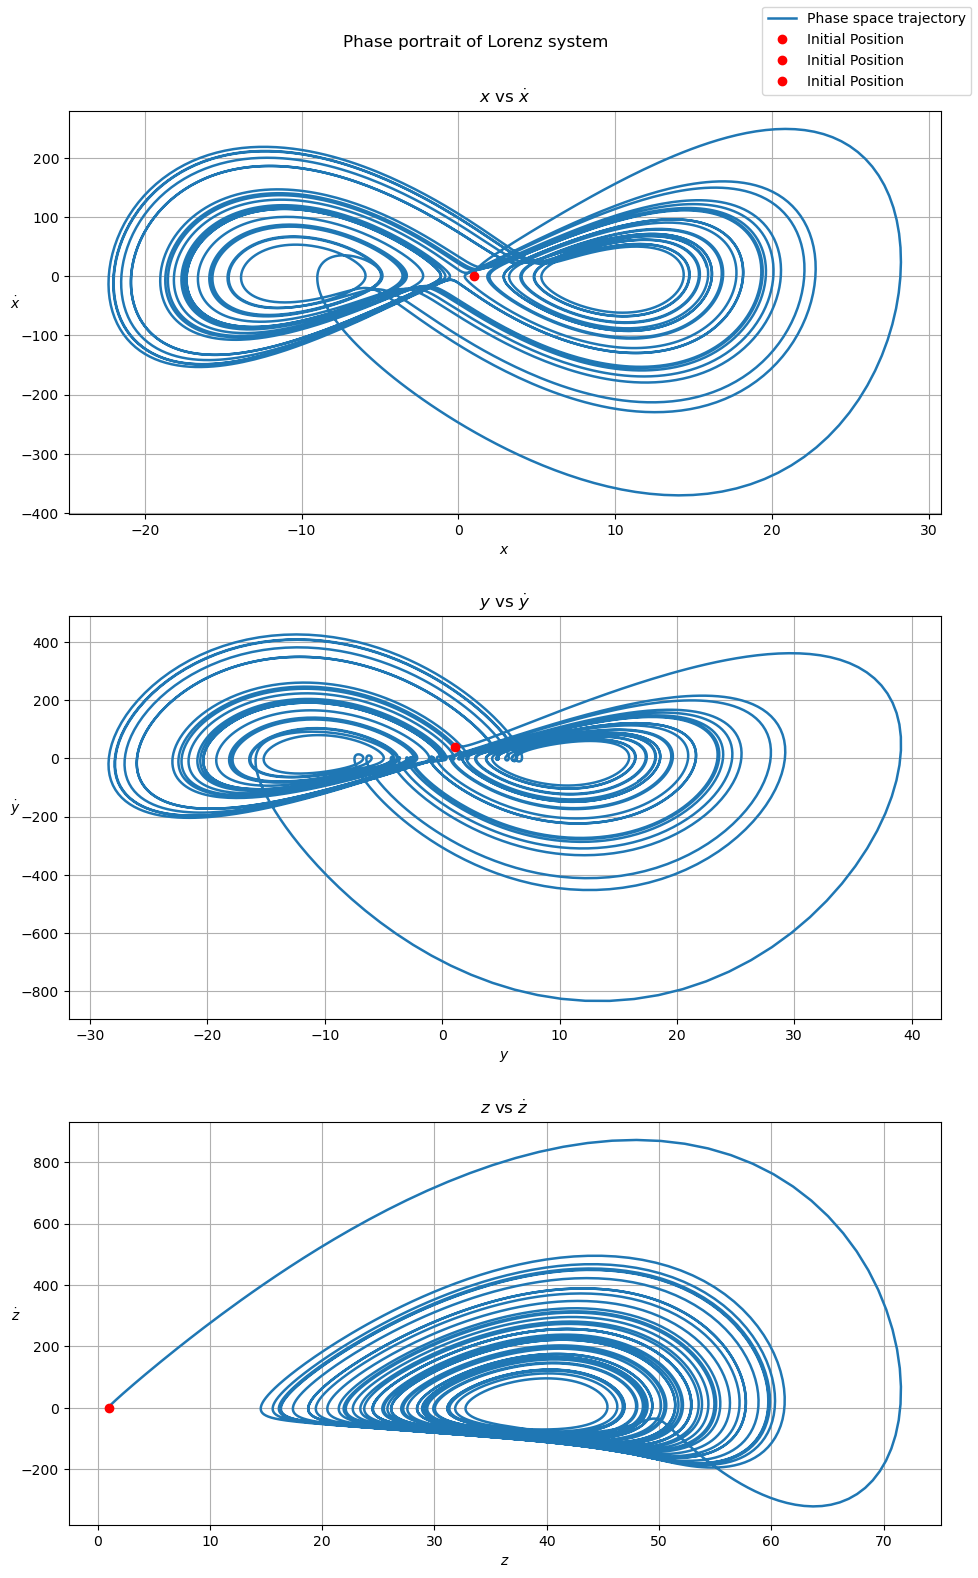

In [51]:
fig, ax = plt.subplots(3,1, figsize=(10,16))
fig.suptitle("Phase portrait of Lorenz system")

ax[0].set_xlabel(r'$x$', rotation="horizontal")
ax[0].set_title(r'$x$ vs $\dot{x}$')
ax[1].set_xlabel(r'$y$', rotation="horizontal")
ax[1].set_title(r'$y$ vs $\dot{y}$')
ax[2].set_xlabel(r'$z$', rotation="horizontal")
ax[2].set_title(r'$z$ vs $\dot{z}$')

ax[0].set_ylabel(r'$\dot{x}$', rotation="horizontal")
ax[1].set_ylabel(r'$\dot{y}$', rotation="horizontal")
ax[2].set_ylabel(r'$\dot{z}$', rotation="horizontal")

maxSample = 10000
ax[0].plot(x[:maxSample], dx[:maxSample], linewidth="1.8", label="Phase space trajectory")
ax[0].plot(x[0], dx[0], "ro", label="Initial Position")
ax[1].plot(y[:maxSample], dy[:maxSample],linewidth="1.8")
ax[1].plot(y[0], dy[0], "ro", label="Initial Position")
ax[2].plot(z[:maxSample], dz[:maxSample],linewidth="1.8")
ax[2].plot(z[0], dz[0], "ro", label="Initial Position")

fig.legend()
for axs in ax:
    axs.grid()

fig.tight_layout(pad=2.5)

plt.savefig("phaseportrait.jpeg", dpi=150)
plt.show()
plt.close()